In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import linalg as LA

In [3]:
# 정렬함수 sort
# - 새로운 사본 만들어서 반환. 원본 건들지 않음
a=np.linspace(1,6,6, dtype=np.int32)
np.random.shuffle(a)
b=np.sort(a)
b

array([1, 2, 3, 4, 5, 6])

In [4]:
# 정렬함수 argsort
bb=np.linspace(1,6,6, dtype=np.int32)
np.random.shuffle(bb)
c=np.argsort(bb)
print(bb)
print(c)

[3 1 2 6 5 4]
[1 2 0 5 4 3]


In [5]:
# 배열 클래스 변경하기
m=np.matrix([1,2,3,4])
a=np.asarray(m)
m1=np.asmatrix(a)

In [6]:
# 배열 원소의 값 변경
o=np.ones(10)
o.fill(100)
a=np.full(o.shape,99.)
a

array([99., 99., 99., 99., 99., 99., 99., 99., 99., 99.])

In [7]:
# 배열 원소에 대한 위치 변경하기
array=np.arange(4).reshape((2,2))
np.fliplr(array)
np.flipud(array)

array([[2, 3],
       [0, 1]])

In [8]:
# 3차원 배열 위치 변경
array1=np.arange(8).reshape((2,2,2))
np.fliplr(array1) # 3차원은 세 번째 축을 기준으로 좌우 위치 변경
np.flipud(array1) # 두 번째 축을 기준으로 상하 위치 변경

array([[[4, 5],
        [6, 7]],

       [[0, 1],
        [2, 3]]])

In [9]:
# 배열 원소에 회전시키기
# 2차원 배열 회전
m=np.array([[1,2],[3,4]],int)
np.rot90(m)
np.rot90(m,2)

array([[4, 3],
       [2, 1]])

In [10]:
# 원소 자리 이동시키는 roll 함수
l=np.arange(1,11)
np.roll(1,1)

ll=np.reshape(l,(2,5))
s=np.roll(ll,1) # 전체 요소 한 칸 이동
print(s)
s1=np.roll(ll,1,axis=0) # 행 단위 이동
print(s1)
s2=np.roll(ll,1,axis=1) # 각 행 마다 이동
print(s2)

[[10  1  2  3  4]
 [ 5  6  7  8  9]]
[[ 6  7  8  9 10]
 [ 1  2  3  4  5]]
[[ 5  1  2  3  4]
 [10  6  7  8  9]]


### 배열의 padding 처리

In [11]:
# 기존 행렬을 사용해서 패딩 하는 방식
x=np.arange(1,5).reshape(2,2)
z=np.zeros((3,3))
z[:2, :2]=x
z

array([[1., 2., 0.],
       [3., 4., 0.],
       [0., 0., 0.]])

In [12]:
# 함수 사용하여 패딩
np.pad(x,(0,1),"constant") # 하단과 우측에 0추가
# np.pad(x=패딩할 어레이, 튜플 or 정수=패딩할 방식, "모드"=패딩할 값)
# constant=0 추가 / edge=확장 부분의 만나는 값 / maximum=현재 배열 최댓값 / minimum=현재 배열 최솟값
# mean=확장 부분 평균값.대각으로 만나는 부분은 소수점 반올림 안하고 절사 값으로 할당 / median=확장 부분 중앙값. 중앙값에 근접한 값 선택 할당

array([[1, 2, 0],
       [3, 4, 0],
       [0, 0, 0]])

### 넘파이 모듈의 자료형 이해하기
- 1. dtype으로 자료형 객체 생성하기

In [13]:
# dtype 클래스 알아보기
np.dtype
d=np.dtype(np.int32)
print(d)

a=np.array([1,2,3,4],dtype=d)
a.dtype

int32


dtype('int32')

In [14]:
# 1.1 자료형 클래스 알아보기
print(np.int_.mro())
print(issubclass(np.int32,np.signedinteger))
print(issubclass(np.integer,np.number))
print(issubclass(np.number,np.generic))

[<class 'numpy.int32'>, <class 'numpy.signedinteger'>, <class 'numpy.integer'>, <class 'numpy.number'>, <class 'numpy.generic'>, <class 'object'>]
True
True
True


### 1.2 자료형 클래스 구조 이해하기
#### 1. 자료형 클래스 구조 알아보기
- 넘파이 모듈 내의 클래스를 구성하는 최상위 클래스는 np.generic이다. 파이썬의 최상의 클래스는 object
- generic 클래스의 상속관계를 _ _bases_ _ 속성을 통해 확인할 수 있다.
- 넘파이 모듈에서는 문자를 처리하는 character 클래스를 제공. 상속관계를 확인하면 flexible 클래스 / 객체를 만들 수 없음

- 실수 및 복소수 자료형 구조 이해하기
- float_ : float64에 대한 짧은 표현
- float16 : 반정도 실수 / sign bit, 5 bits exponent, 10 bits mantissa
- float32 : 단일 정보 실수 / sign bit, 8 bits exponent, 23 bits mantissa
- float64 : 더블 정보 실수 / sign bit, 11 bits exponent, 52 bits mantissa
- Complex_ : 복소수의 대표 표현
- Complex64 : 복소수의 실수와 허수 / two 32-bit floats
- Complex128 : 복소수의 실수와 허수 / two 64-bit floats

### 2.1 날짜처리
#### 날짜 클래스 알아보기
- 넘파이 모듈은 2개의 클래스 np.datetime64와 timedelta64를 제공한다.

In [15]:
# 3개의 날짜를 전달해서 다차원 배열 만들기
a=np.array(['2018-11-15','2018-12-15','2010-01-15'],dtype=np.datetime64)
a

array(['2018-11-15', '2018-12-15', '2010-01-15'], dtype='datetime64[D]')

In [22]:
# 두 개의 날짜 객체를 만들어서 두 날짜의 차이 계산
delta=np.datetime64('2018-11-15')-np.datetime64('2016-11-15')
delta

numpy.timedelta64(730,'D')

In [23]:
# arrange 함수를 사용해서 날짜 기준 배열 만들기.
# 시작일과 종료일을 넣어서 생성하거나 시작 월과 종료 월을 넣어서 만드는 방법도 가능
a=np.arange('2019-02','2019-03',dtype='datetime64[D]')
a

array(['2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
       '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
       '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16',
       '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20',
       '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',
       '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28'],
      dtype='datetime64[D]')

### 2.2 시간에 대한 처리
#### 시간 처리 알아보기
- datetime64 클래스에 문자열로 2018-12-01T01을 지정해서 객체 생성

In [24]:
m=np.datetime64('2018-12-01T01:01')
m

numpy.datetime64('2018-12-01T01:01')

### 2.3 비즈니스 일자 처리
#### 영업일 처리 알아보기
- 특정 일자를 부여하고 일수를 증가하면 토요일과 일요일을 제외한 평일을 기준으로 날짜를 처리하는 busdat_offset 함수를 제공

In [25]:
# 2018년 11월에 주말을 제외한 영업을 계산해보기
start=np.datetime64('2018-11-01')
end=np.datetime64('2018-11-30')
np.busday_count(start,end)

21

In [26]:
# 휴일 추가하기
bdd=np.busdaycalendar(holidays=['2019-01-01','2019-09-23'])
bdd.holidays

array(['2019-01-01', '2019-09-23'], dtype='datetime64[D]')

### 시각화와 수학함수
#### 01. 시각화 알아보기

In [16]:
x=np.linspace(0, 2*np.pi, 100)
y=np.sin(x)

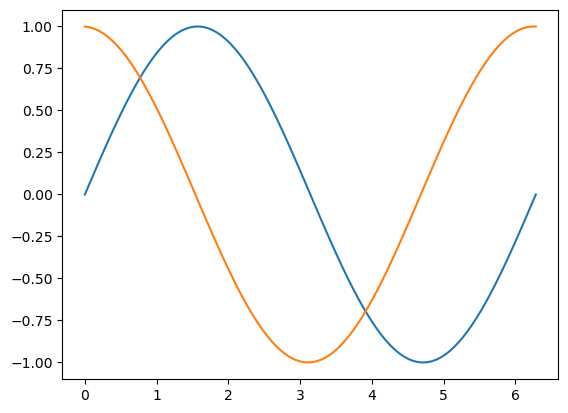

In [17]:
dy=np.zeros(y.shape,np.float64)
dy[:-1]=np.diff(y)/np.diff(x)
dy[-1]=(y[-1]-y[-2])/(x[-1]-x[-2])

plt.plot(x,y)
plt.plot(x,dy)

In [18]:
# 배열을 다항식으로 만들기
a=np.array([1,-2,1])
p=np.poly1d(a)
print(p)

   2
1 x - 2 x + 1


In [19]:
# 적분 결과 보기
x2=np.arange(5)
y2=x2**2
np.trapz(y2,x=x2)

22.0

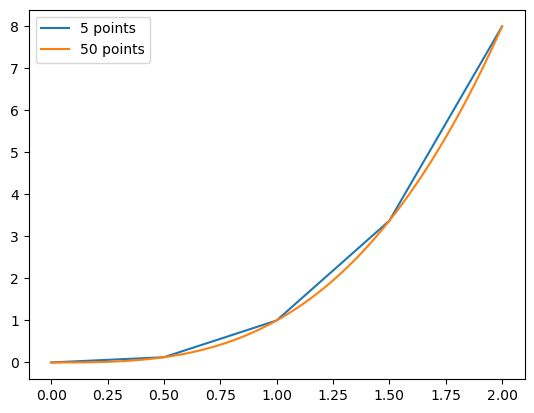

In [20]:
x=np.array([0,0.5,1,1.5,2])
y=x**3

x2=np.linspace(0,2,100)
y2=x2**3

plt.plot(x,y,label='5 points')
plt.plot(x2,y2,label='50 points')
plt.legend()
plt.show()

In [21]:
# quad 방식으로 적분하기
x2=lambda x:x**2
quad(x2,0,4)

(21.333333333333336, 2.368475785867001e-13)